In [1072]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [1073]:
# reading the dataset
bikes = pd.read_csv("day.csv")

In [1074]:
# checking the data
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1075]:
# checking the shape of dataset
bikes.shape

(730, 16)

In [1076]:
# checking the info of dataset
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1077]:
# checking the description of dataset
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1078]:
# checking the dataset for null values
bikes.isnull().sum()

# No missing values are present

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1079]:
# Encoding the variables
bikes['season']=bikes.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
bikes['mnth']=bikes.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
bikes['weathersit']=bikes.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
bikes['weekday']=bikes.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [1080]:
# Checking the dataset
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


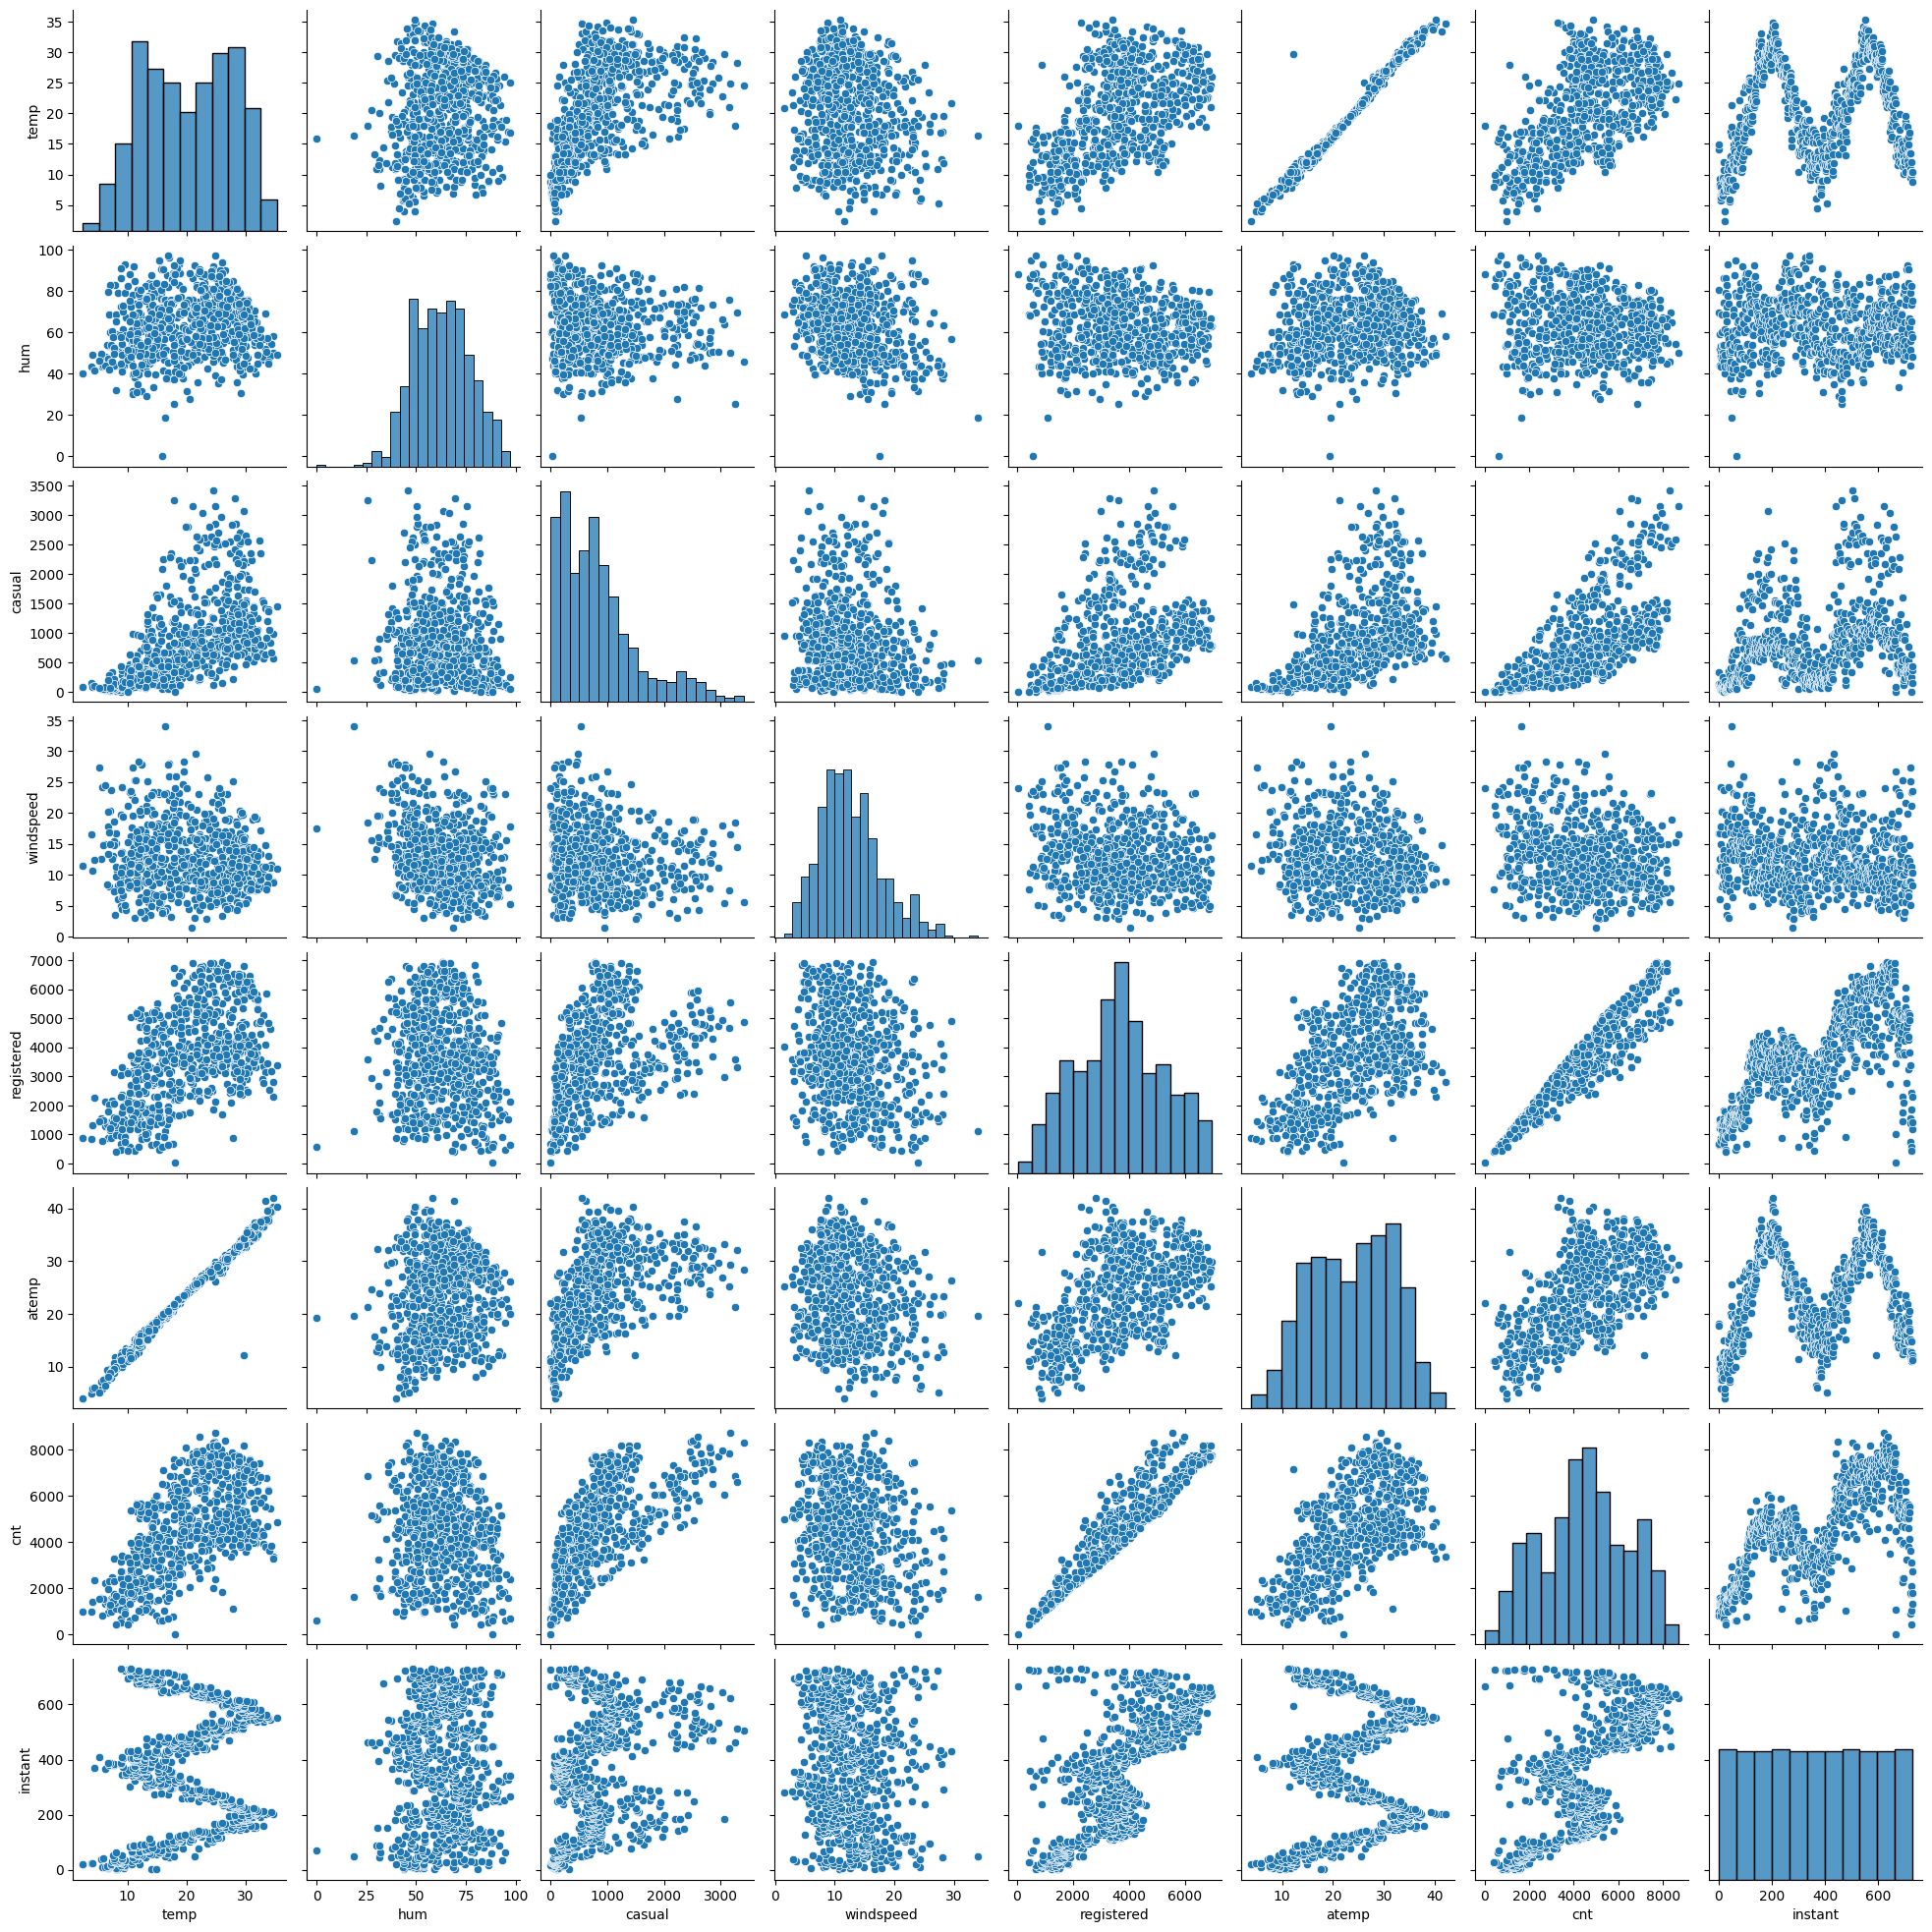

In [1081]:
# Plotting pair plot for numerical variables
sns.pairplot(bikes,vars=['temp','hum','casual','windspeed','registered','atemp','cnt', 'instant'])

##### We can say from above pair plot that cnt (count of rental bikes) variable is positively correlated with some independent variables

<Axes: xlabel='weekday', ylabel='cnt'>

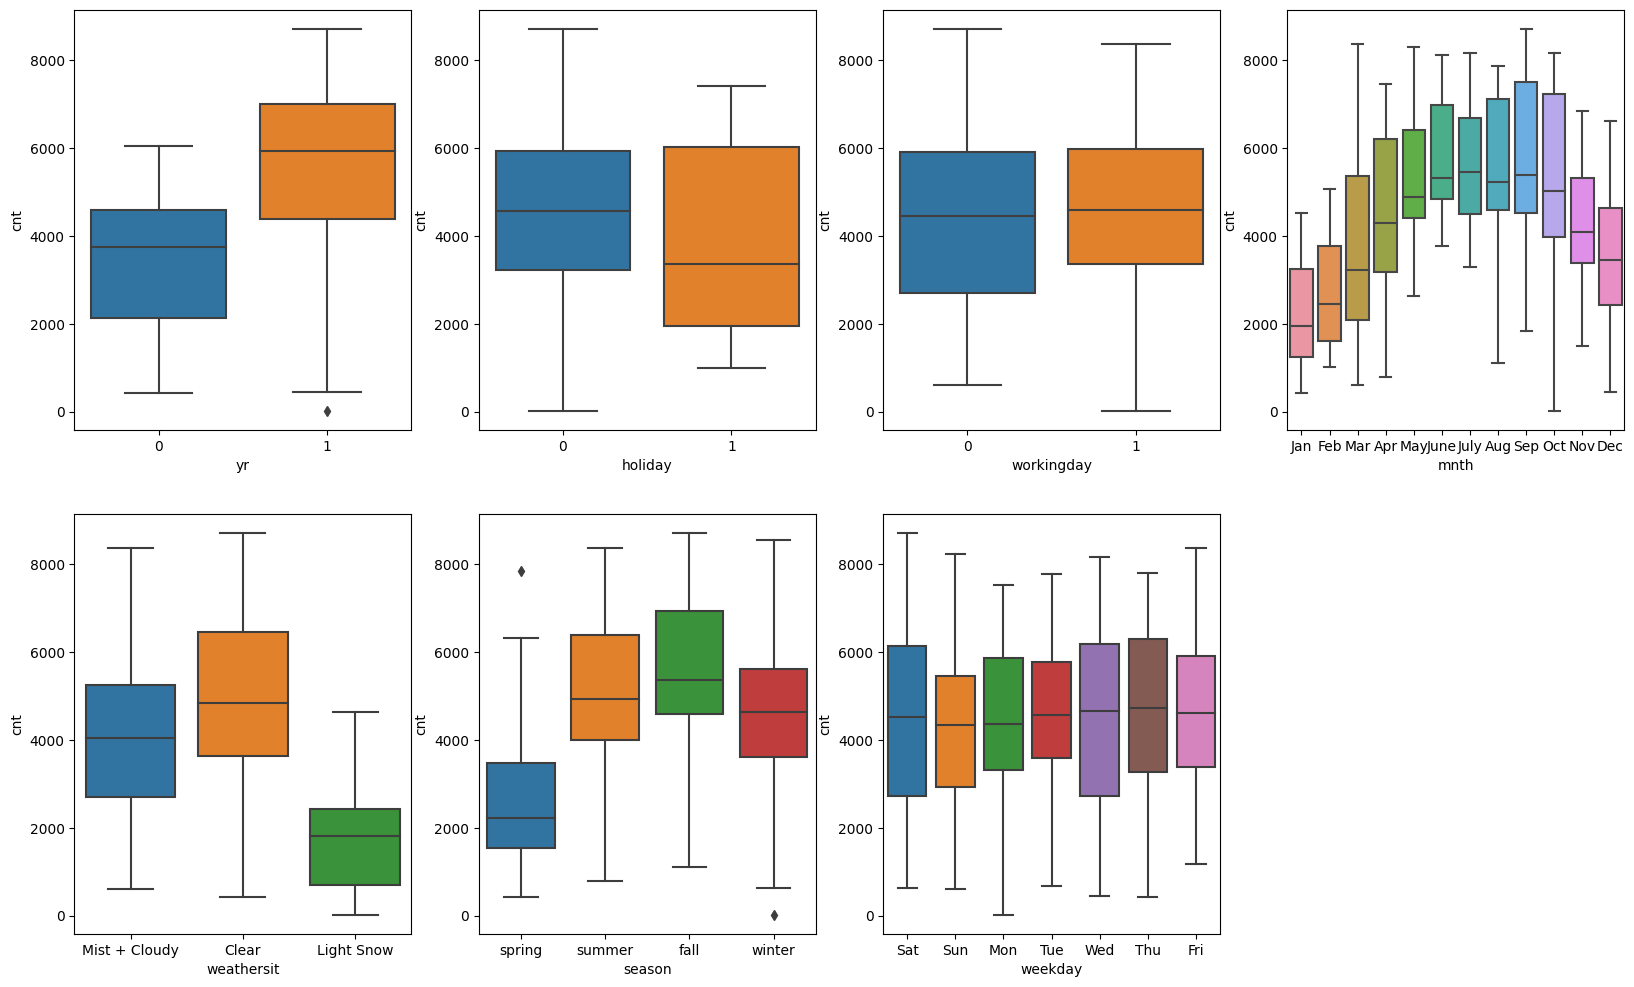

In [1082]:
# Plotting boxplot for categorical variables
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot (x='yr', y='cnt',data= bikes)
plt.subplot(2,4,2)
sns.boxplot (x='holiday', y='cnt',data= bikes)
plt.subplot(2,4,3)
sns.boxplot (x='workingday', y='cnt',data= bikes)
plt.subplot(2,4,4)
sns.boxplot (x='mnth', y='cnt',data= bikes)
plt.subplot(2,4,5)
sns.boxplot (x='weathersit', y='cnt',data= bikes)
plt.subplot(2,4,6)
sns.boxplot (x='season', y='cnt',data= bikes)
plt.subplot(2,4,7)
sns.boxplot (x='weekday', y='cnt',data= bikes)

##### Interpretation from bar plot
- Rented bikes count is maximum in fall season
- Bikes rented in 2019 are more compared to 2018
- Bikes are rented more on Sat, Wed and Thur.
- Bikes are rented more in clear weather

<Axes: xlabel='season', ylabel='cnt'>

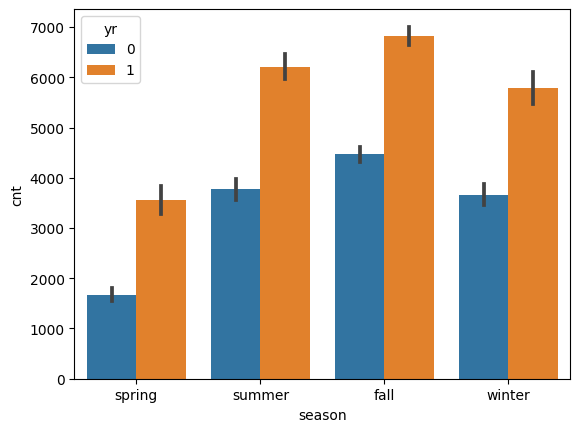

In [1083]:
# plotting barplot for season vs cnt
sns.barplot(data= bikes, x = 'season', y = 'cnt', hue='yr')

##### Boom bike is rented highest in fall season

<Axes: xlabel='mnth', ylabel='cnt'>

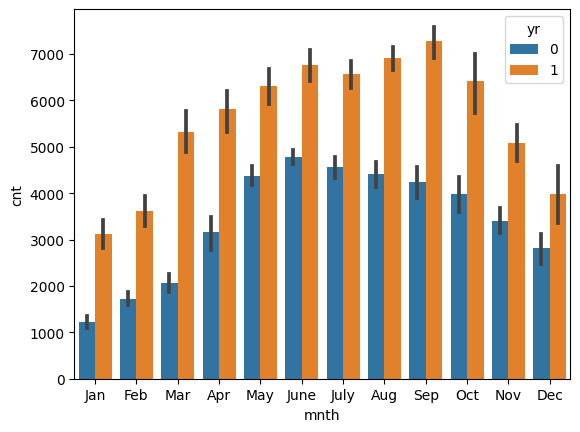

In [1084]:
# plotting barplot for mnth vs cnt
sns.barplot(data= bikes, x = 'mnth', y = 'cnt', hue='yr')

##### Number of rented bikes increases from the month of Jan to June then it decreaes in the month of July, again it increases in Aug and Sep and then decreases from Oct to Dec

<Axes: xlabel='yr', ylabel='cnt'>

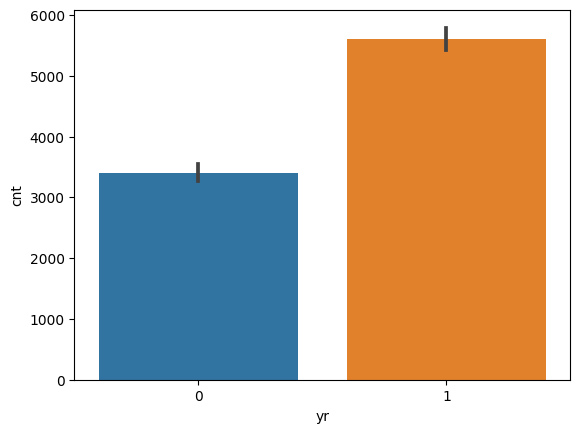

In [1085]:
# plotting barplot for yr vs cnt
sns.barplot(data= bikes, x = 'yr', y = 'cnt')

##### Rented bike counts is more in 2019 compared to 2018

<Axes: xlabel='weathersit', ylabel='cnt'>

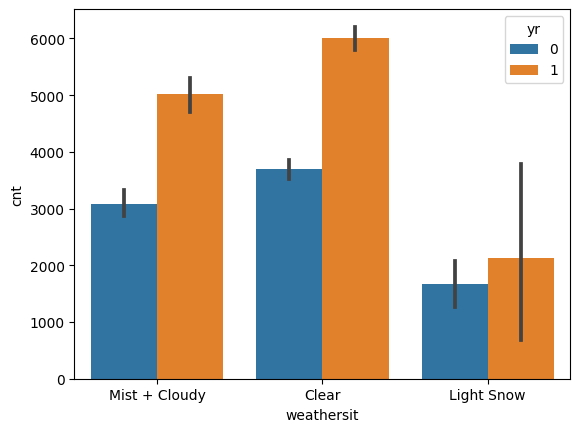

In [1086]:
# plotting barplot
sns.barplot(data= bikes, x = 'weathersit', y = 'cnt', hue='yr')

##### Most number of bikes are rented on clear weather

Text(0.5, 1.0, 'Correlation between variables')

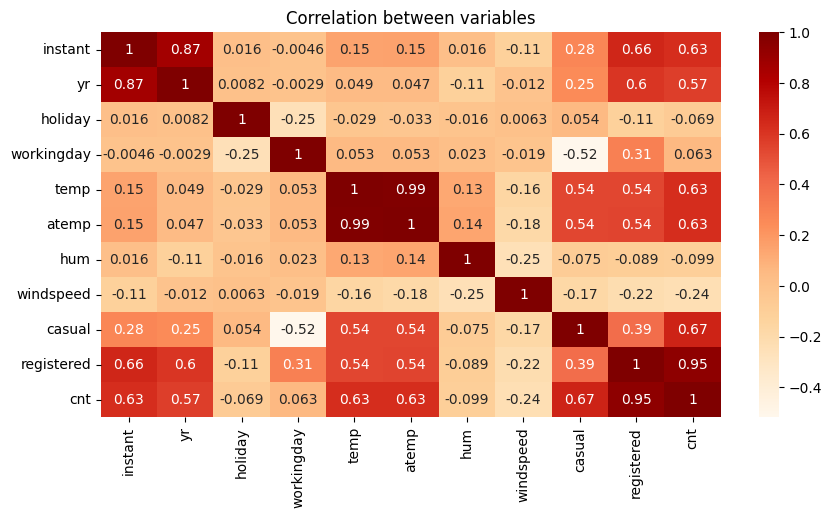

In [1087]:
# plotting heatmap to check the correlation between variables
bikes_num = bikes[['instant','yr','holiday','workingday','temp','atemp','hum','windspeed','casual','registered','cnt']]
plt.figure(figsize=(10,5))
sns.heatmap(bikes_num.corr(),cmap='OrRd',annot=True)
plt.title('Correlation between variables')

##### From the above heatmap we can see that registered, casual, atemp, temp, yr and instant are correlated with cnt variable

In [1088]:
# Dropping insignificant variables from dataset
bikes = bikes.drop(['atemp','instant','dteday','casual','registered'], axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [1089]:
# Checking the shape
bikes.shape

(730, 11)

In [1090]:
# Checking the datatype of the variables
bikes.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [1091]:
# Creating dummy variables for month, weekday, weathersit, seasons
month = pd.get_dummies(bikes.mnth, drop_first= True, dtype = int)
weekday = pd.get_dummies(bikes.weekday, drop_first= True, dtype = int)
weathersit = pd.get_dummies(bikes.weathersit, drop_first= True, dtype = int)
season = pd.get_dummies(bikes.season, drop_first= True, dtype = int)

In [1092]:
# Adding the dummy variables to the original dataframe
bikes = pd.concat([bikes, month, weekday, weathersit, season], axis=1)
bikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,spring,0,Jan,0,Sat,0,Mist + Cloudy,14.110847,80.5833,10.749882,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,Jan,0,Sun,0,Mist + Cloudy,14.902598,69.6087,16.652113,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,1,0,0,1,0,0


In [1093]:
# Dropping the variables season, mnth, weekday, weathersit as we have created dummy variables for them
bikes.drop(['season', 'mnth', 'weekday', 'weathersit'], axis=1, inplace = True)
bikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [1094]:
# Checking the info of dataset
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   hum            730 non-null    float64
 5   windspeed      730 non-null    float64
 6   cnt            730 non-null    int64  
 7   Aug            730 non-null    int32  
 8   Dec            730 non-null    int32  
 9   Feb            730 non-null    int32  
 10  Jan            730 non-null    int32  
 11  July           730 non-null    int32  
 12  June           730 non-null    int32  
 13  Mar            730 non-null    int32  
 14  May            730 non-null    int32  
 15  Nov            730 non-null    int32  
 16  Oct            730 non-null    int32  
 17  Sep            730 non-null    int32  
 18  Mon       

In [1095]:
# Checking the shape of dataset
bikes.shape

(730, 29)

Text(0.5, 1.0, 'Correlation between new variables')

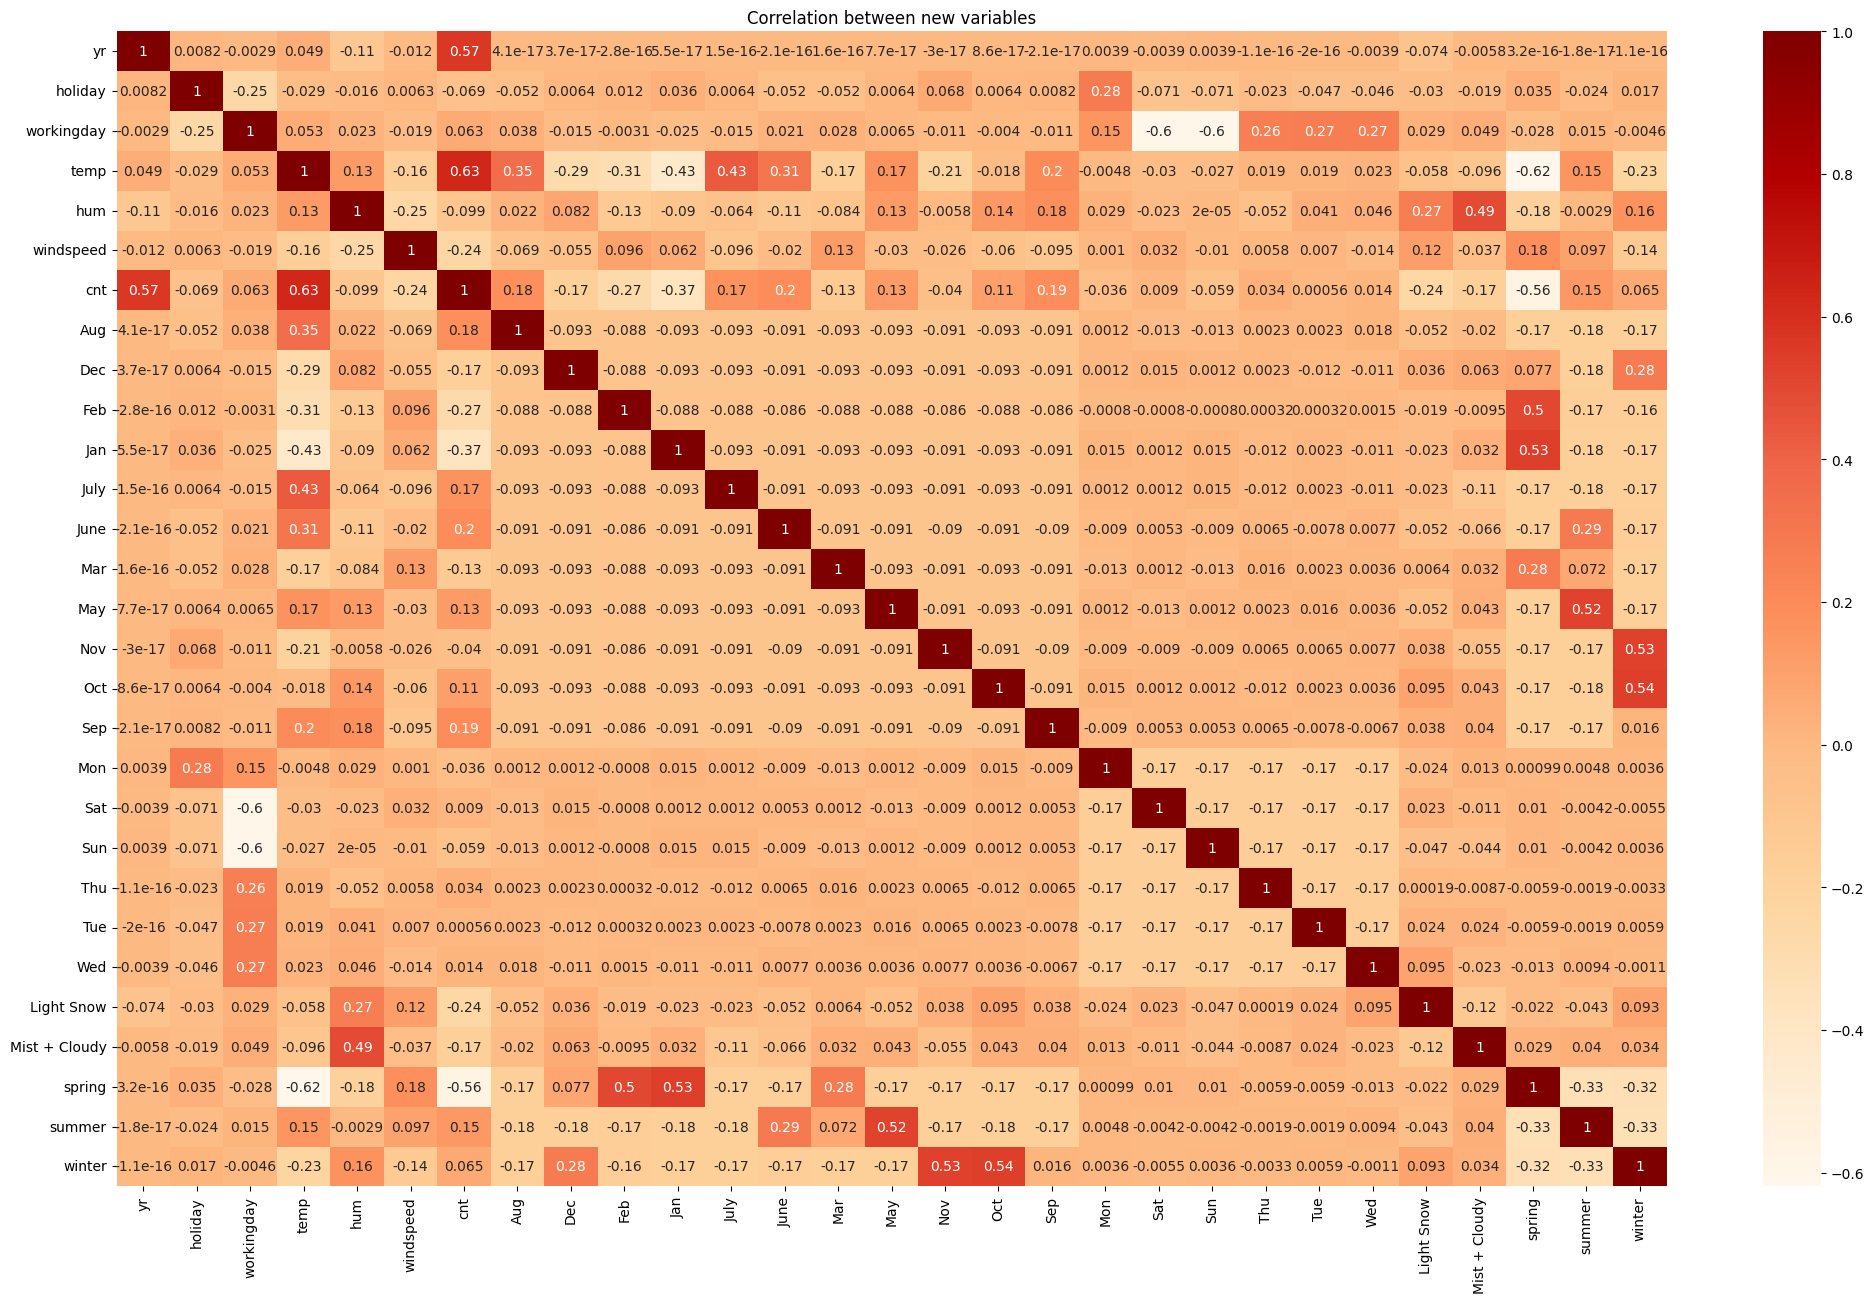

In [1096]:
# Plotting heatmap to check the correlation between new variables
plt.figure(figsize=(25,15))
sns.heatmap(bikes.corr(), cmap='OrRd', annot = True)
plt.title('Correlation between new variables')

##### From the above heatmap we can say that cnt variable has good correlation with temp, yr, summer, June, July, Aug, Sep

##### Preparing the data for model training

In [1097]:
# Splitting the Data into Training and Testing Sets
bikes_train, bikes_test = train_test_split(bikes, train_size=0.7, random_state=100)

In [1098]:
# Checking the shape of training set
bikes_train.shape

(510, 29)

In [1099]:
# Checking the shape of test set
bikes_test.shape

(220, 29)

##### Scaling the variables using MinMax scaling

In [1100]:
# Scaling the variables temp, hum, windspeed and cnt as they have large values compared to others
scaler = MinMaxScaler()
scaler_vars = ['hum', 'windspeed', 'temp', 'cnt']
bikes_train[scaler_vars] = scaler.fit_transform(bikes_train[scaler_vars])
bikes_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [1101]:
# Checking the description of train set after scaling
bikes_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.468282,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### The max value of the variables is not more than 1 and the min value is not less than 0 so the variables have been scaled properly

Text(0.5, 1.0, 'Correlation between variables')

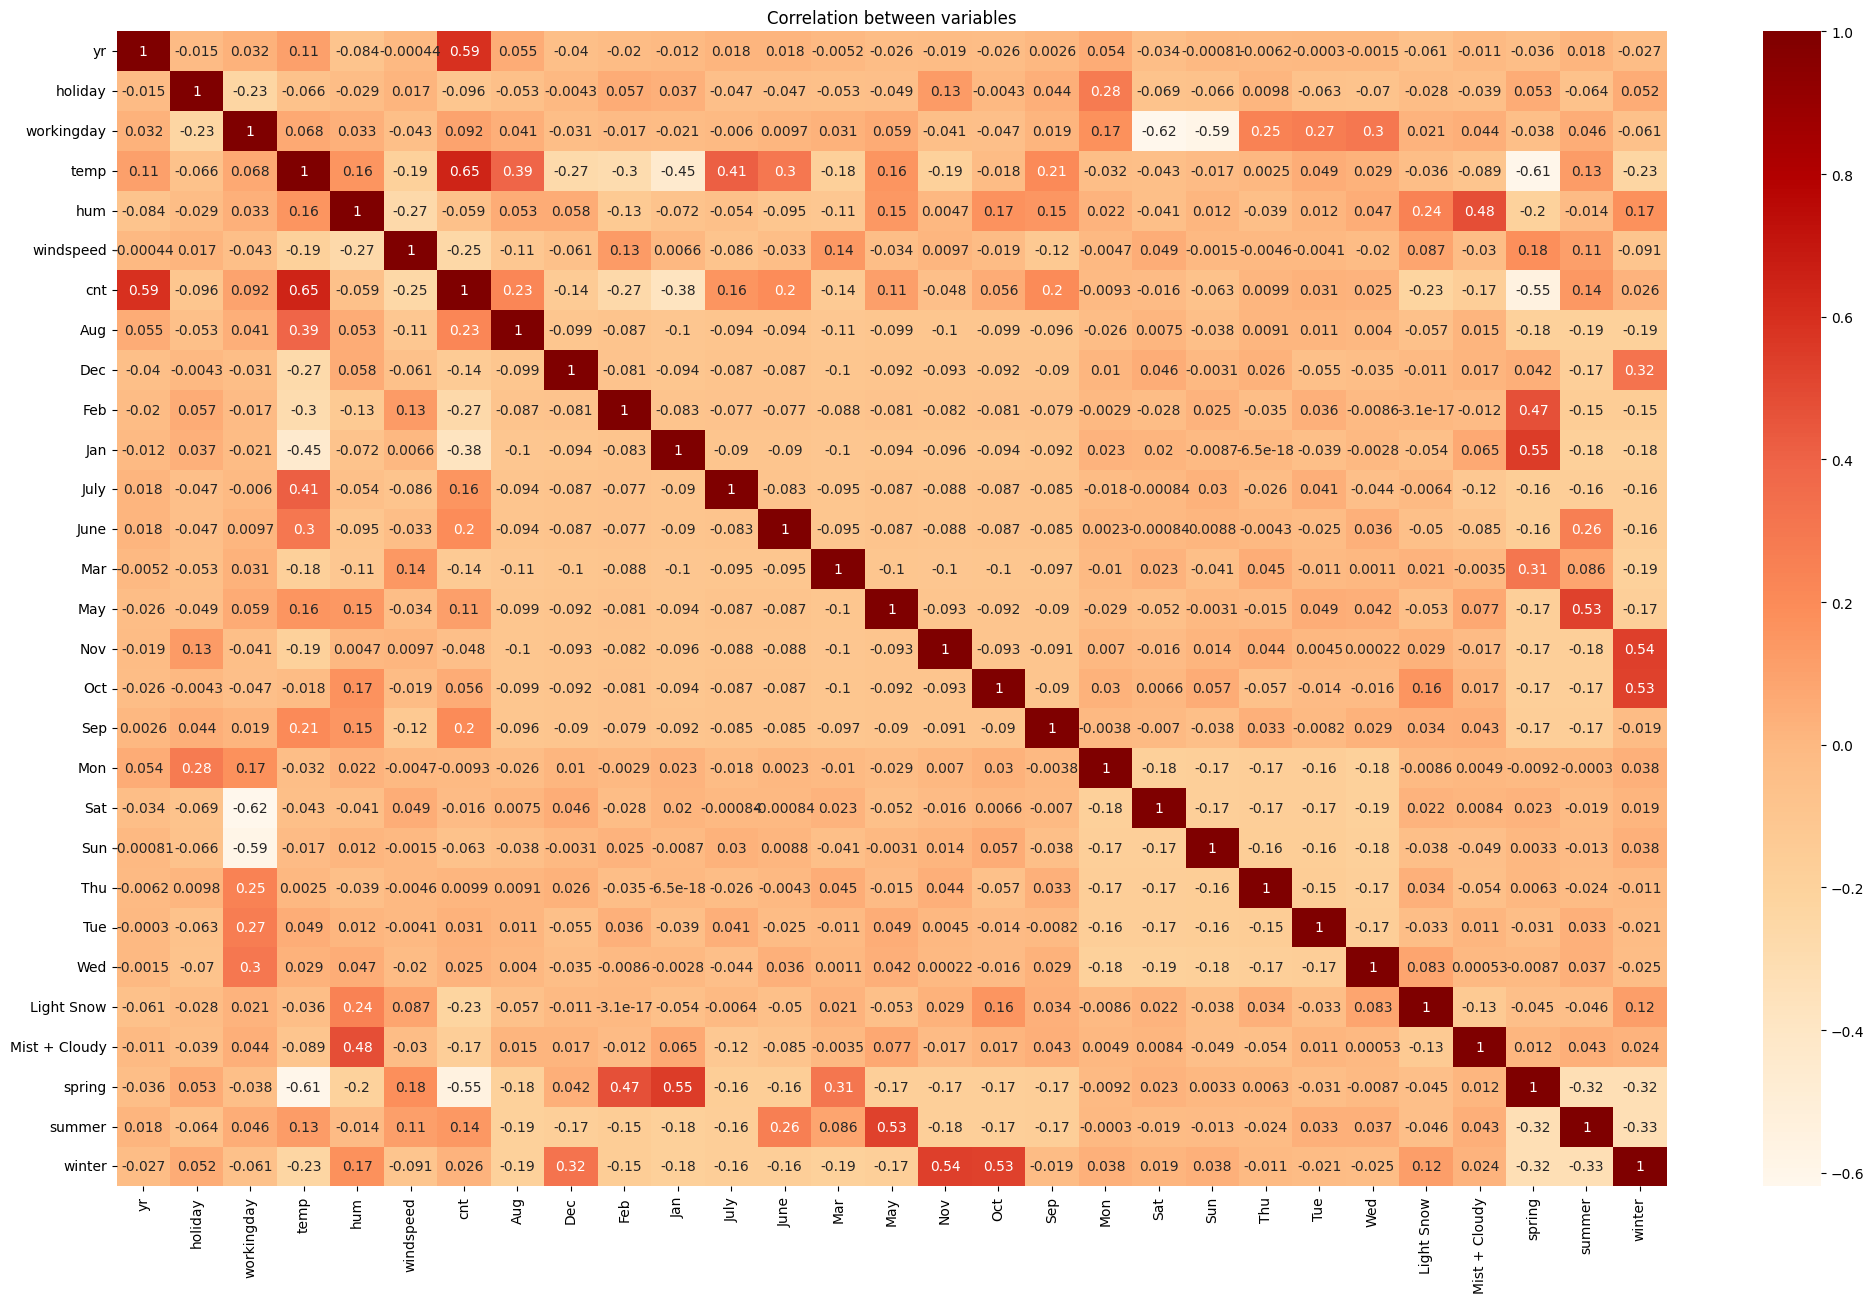

In [1102]:
# Plotting heatmap to check the multicollinearity between variables
plt.figure(figsize=(25,15))
sns.heatmap(bikes_train.corr(), cmap='OrRd', annot=True)
plt.title('Correlation between variables')

##### From the above heatmap we can say that cnt variable has good correlation with temp and yr
##### There is not high collinearity among predictors

<Axes: xlabel='temp', ylabel='cnt'>

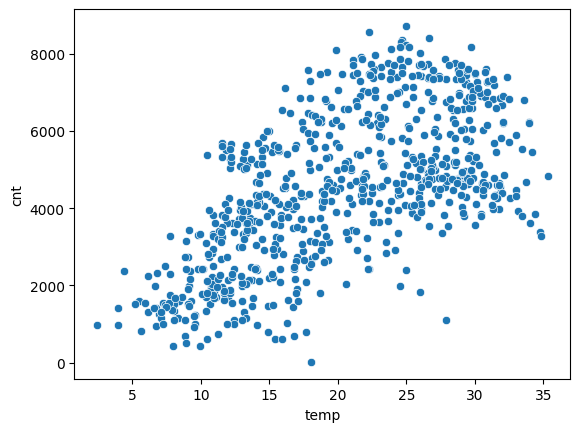

In [1103]:
# Plotting scatter plot for temp vs count
sns.scatterplot(x='temp',y='cnt' ,data=bikes)

In [1104]:
# Dividing into X and Y sets for the model building
y_train = bikes_train.pop('cnt')
X_train = bikes_train

In [1105]:
# Checking y_train variable
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [1106]:
# Checking X_train variables
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.498067,0.663106,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.751824,0.380981,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


##### Building the model
##### Using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [1107]:
# Creating the RFE object
lm = LinearRegression()
lm.fit(X_train, y_train)

# Setting the feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15)

# Running RFE
rfe = rfe.fit(X_train, y_train)


In [1108]:
# Checking the selected variables
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 12),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', False, 3),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('Mon', False, 8),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 13),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [1109]:
# Storing the selected feature variables
true_rfe = X_train.columns[rfe.support_]
true_rfe

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'July',
       'Sep', 'Sat', 'Sun', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [1110]:
# Checking the unselected variables
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'Jan', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Thu', 'Tue', 'Wed'],
      dtype='object')

##### Building model using statsmodel, for the detailed statistics

In [1111]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[true_rfe]

In [1112]:
# Adding a constant 
X_train_rfe = sm.add_constant(X_train_rfe)

# Creating the training linear model
lr = sm.OLS(y_train,X_train_rfe)

#fit
lr_model = lr.fit()

# checking the parameters
lr_model.params

const            0.199526
yr               0.229763
holiday         -0.018447
workingday       0.083669
temp             0.527708
hum             -0.161086
windspeed       -0.180875
July            -0.054616
Sep              0.081983
Sat              0.093668
Sun              0.040636
Light Snow      -0.245009
Mist + Cloudy   -0.056344
spring          -0.055546
summer           0.053733
winter           0.099214
dtype: float64

In [1113]:
# Checking model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          2.11e-191
Time:                        10:24:02   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1995      0.028      7.200      0.000       0.145       0.254
yr                0.2298      0.008     28.647      0.000       0.214       0.246
holiday          -0.0184      0.021     -0.867      0.386      -0.060       0.023
workingday        0.0837      0.010      8.665      0.000       0.065       0.103
temp              0.5277      0.033     15.884      0.000       0.462       0.593
hum              -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed        -0.1809      0.025     -7.118      0.000      -0.231      -0.131
July             -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep               0.0820      0.017      4.966      0.000       0.050       0.114
Sat               0.0937      0.012      8.040      0.000       0.071       0.117
Sun               0.0406      0.012      3.315      0.001       0.017       0.065
Light Snow       -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist + Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring           -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer            0.0537      0.015      3.631      0.000       0.025       0.083
winter            0.0992      0.017      5.815      0.000       0.066       0.133
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                     6.46e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.62e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [1114]:
# Checking VIF of model

#dropping the constant variables from the dataset
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [1115]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.68
8,Sat,12.20
9,Sun,11.79
12,spring,5.02
3,temp,3.62
14,winter,3.49
1,holiday,2.91
13,summer,2.62
4,hum,1.91
11,Mist + Cloudy,1.57


High p-value (more than or equal to 0.05), high VIF (more than 5) - remove these

High-Low:
         
         - High p, low VIF: remove these first and then rebuild the model and check VIF
         
         - Low p, high VIF: remove these after the ones above

Low p, Low VIF - do not remove

In [1116]:
# workingday variable can be dropped due to high VIF
X_train_new_1 = X_train_rfe.drop(['workingday'], axis=1)

In [1117]:
# Adding constant
X_train_lr1 = sm.add_constant(X_train_new_1)

# Creating training model
lr = sm.OLS(y_train, X_train_lr1)

# fit
lr_model = lr.fit()

# Model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          2.11e-191
Time:                        10:24:02   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2832      0.034      8.300      0.000       0.216       0.350
yr                0.2298      0.008     28.647      0.000       0.214       0.246
holiday          -0.1021      0.025     -4.024      0.000      -0.152      -0.052
temp              0.5277      0.033     15.884      0.000       0.462       0.593
hum              -0.1611      0.037     -4.313      0.000      -0.234      -0.088
windspeed        -0.1809      0.025     -7.118      0.000      -0.231      -0.131
July             -0.0546      0.018     -3.019      0.003      -0.090      -0.019
Sep               0.0820      0.017      4.966      0.000       0.050       0.114
Sat               0.0100      0.011      0.897      0.370      -0.012       0.032
Sun              -0.0430      0.012     -3.725      0.000      -0.066      -0.020
Light Snow       -0.2450      0.026     -9.395      0.000      -0.296      -0.194
Mist + Cloudy    -0.0563      0.010     -5.425      0.000      -0.077      -0.036
spring           -0.0555      0.021     -2.698      0.007      -0.096      -0.015
summer            0.0537      0.015      3.631      0.000       0.025       0.083
winter            0.0992      0.017      5.815      0.000       0.066       0.133
==============================================================================
Omnibus:                       64.769   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.630
Skew:                          -0.663   Prob(JB):                     9.73e-35
Kurtosis:                       5.369   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1118]:
# Checking VIF of model

# Dropping Constant
X_train_lr1 = X_train_lr1.drop(['const'], axis = 1)

In [1119]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.25
2,temp,16.06
4,windspeed,4.68
11,spring,4.03
13,winter,3.36
12,summer,2.79
10,Mist + Cloudy,2.30
0,yr,2.08
5,July,1.59
6,Sep,1.39


In [1120]:
# Sat variable can be dropped due to high p-value and low VIF
X_train_new_2 = X_train_lr1.drop(['Sat'], axis=1)

In [1121]:
# Adding constant
X_train_lr2 = sm.add_constant(X_train_new_2)

#creating training model
lr = sm.OLS(y_train, X_train_lr2)

#fit
lr_model = lr.fit()

# Model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.8
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          2.12e-192
Time:                        10:24:03   Log-Likelihood:                 517.20
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -947.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2858      0.034      8.409      0.000       0.219       0.353
yr                0.2295      0.008     28.639      0.000       0.214       0.245
holiday          -0.1041      0.025     -4.118      0.000      -0.154      -0.054
temp              0.5273      0.033     15.876      0.000       0.462       0.593
hum              -0.1623      0.037     -4.349      0.000      -0.236      -0.089
windspeed        -0.1801      0.025     -7.092      0.000      -0.230      -0.130
July             -0.0543      0.018     -3.004      0.003      -0.090      -0.019
Sep               0.0821      0.017      4.974      0.000       0.050       0.115
Sun              -0.0449      0.011     -3.952      0.000      -0.067      -0.023
Light Snow       -0.2447      0.026     -9.385      0.000      -0.296      -0.193
Mist + Cloudy    -0.0562      0.010     -5.411      0.000      -0.077      -0.036
spring           -0.0555      0.021     -2.696      0.007      -0.096      -0.015
summer            0.0537      0.015      3.627      0.000       0.025       0.083
winter            0.0995      0.017      5.834      0.000       0.066       0.133
==============================================================================
Omnibus:                       61.336   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.517
Skew:                          -0.618   Prob(JB):                     4.62e-34
Kurtosis:                       5.387   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1122]:
# Checking the VIF of the model

# Dropping Constant
X_train_lr2 = X_train_lr2.drop(['const'], axis= True)

In [1123]:
# Calculating VIF
vif = pd.DataFrame()
X = X_train_new_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.24
2,temp,16.04
4,windspeed,4.66
10,spring,4.01
12,winter,3.34
11,summer,2.79
9,Mist + Cloudy,2.30
0,yr,2.08
5,July,1.59
6,Sep,1.39


In [1124]:
# hum variable can be dropped due to a high VIF
X_train_new_3 = X_train_lr2.drop(['hum'], axis = 1)

In [1125]:
# Adding constant
X_train_lr3 = sm.add_constant(X_train_new_3)

#creating training model
lr = sm.OLS(y_train, X_train_lr3)

#fit
lr_model = lr.fit()

# Model summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     218.9
Date:                Wed, 12 Jul 2023   Prob (F-statistic):          1.45e-189
Time:                        10:24:03   Log-Likelihood:                 507.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     497   BIC:                            -934.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2060      0.029      7.074      0.000       0.149       0.263
yr                0.2335      0.008     28.807      0.000       0.218       0.249
holiday          -0.1052      0.026     -4.089      0.000      -0.156      -0.055
temp              0.4907      0.033     15.004      0.000       0.426       0.555
windspeed        -0.1479      0.025     -5.981      0.000      -0.196      -0.099
July             -0.0492      0.018     -2.680      0.008      -0.085      -0.013
Sep               0.0760      0.017      4.541      0.000       0.043       0.109
Sun              -0.0483      0.012     -4.191      0.000      -0.071      -0.026
Light Snow       -0.2895      0.024    -11.878      0.000      -0.337      -0.242
Mist + Cloudy    -0.0822      0.009     -9.517      0.000      -0.099      -0.065
spring           -0.0655      0.021     -3.147      0.002      -0.106      -0.025
summer            0.0475      0.015      3.171      0.002       0.018       0.077
winter            0.0848      0.017      4.984      0.000       0.051       0.118
==============================================================================
Omnibus:                       63.016   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.263
Skew:                          -0.633   Prob(JB):                     4.30e-35
Kurtosis:                       5.417   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1126]:
# Checking the VIF of the model

# Dropping Constant
X_train_lr3 = X_train_lr3.drop(['const'], axis= True)

In [1127]:
# Calculating VIF
vif = pd.DataFrame()
X = X_train_new_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.14
3,windspeed,4.60
10,summer,2.24
9,spring,2.11
0,yr,2.07
11,winter,1.81
4,July,1.59
8,Mist + Cloudy,1.56
5,Sep,1.34
6,Sun,1.18


##### Residual Analysis

In [1128]:
# Adding constant
X_train_lr3 = sm.add_constant(X_train_lr3)
X_train_lr3

,const,yr,holiday,temp,windspeed,July,Sep,Sun,Light Snow,Mist + Cloudy,spring,summer,winter
576,1.0,1,0,0.815169,0.264686,1,0,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,1,1,0,0
728,1.0,1,0,0.245101,0.663106,0,0,1,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,0,0,0,0,1,0,1,0
111,1.0,0,0,0.345824,0.380981,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0,0,1,0,0,1
79,1.0,0,0,0.462664,0.529881,0,0,0,0,1,0,1,0


In [1129]:
# Calculating y_train_pred for residual analysis
y_train_pred = lr_model.predict(X_train_lr3)

Text(0.5, 9.444444444444438, 'Errors')

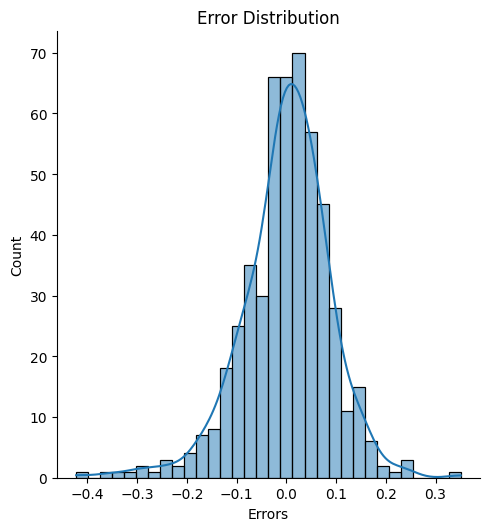

In [1130]:
# Calculating residual
res = y_train - y_train_pred

# Plotting error
sns.displot(res, kde = True)
plt.title('Error Distribution')                
plt.xlabel('Errors') 

##### Looking at above distribution we can say it is a normal distribution and it is centered around 0

<Axes: >

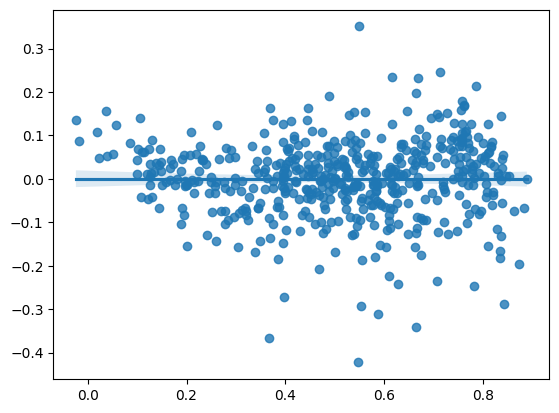

In [1131]:
# Plotting regplot
sns.regplot(x=y_train_pred,y=res)

##### Looking at above graph we can say following
- Variance of Errors doesnt follow any trends
- Residual errors are independent of each other since the Predicted values vs Residuals plot doesn't show any trend.

##### Making Predictions, applying the scaling on the test sets

In [1132]:
# Checking the variables to be scaled
scaler_vars

['hum', 'windspeed', 'temp', 'cnt']

In [1133]:
# Performing scaling on test data
bikes_test[scaler_vars] = scaler.transform(bikes_test[scaler_vars])

In [1134]:
# Checking test dataset
bikes_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Aug,Dec,Feb,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1135]:
# Dividing into X_test and y_test
y_test = bikes_test.pop('cnt')
X_test = bikes_test

In [1136]:
# Checking the values of y_test
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [1137]:
# Checking the values of X_test
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,Aug,Dec,Feb,Jan,...,Sat,Sun,Thu,Tue,Wed,Light Snow,Mist + Cloudy,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [1138]:
# Checking variables
X_train_lr3.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'July', 'Sep', 'Sun',
       'Light Snow', 'Mist + Cloudy', 'spring', 'summer', 'winter'],
      dtype='object')

In [1139]:
# Dropping constant
X_train_lr3.drop(columns = 'const', inplace = True)
X_train_lr3

,yr,holiday,temp,windspeed,July,Sep,Sun,Light Snow,Mist + Cloudy,spring,summer,winter
576,1,0,0.815169,0.264686,1,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,1,1,0,0
728,1,0,0.245101,0.663106,0,0,1,0,0,1,0,0
482,1,0,0.395666,0.188475,0,0,0,0,1,0,1,0
111,0,0,0.345824,0.380981,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.187140,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.111379,0,0,0,0,0,1,0,0
350,0,0,0.248216,0.431816,0,0,0,0,1,0,0,1
79,0,0,0.462664,0.529881,0,0,0,0,1,0,1,0


In [1140]:
# Creating X_test_new dataframe
X_test_new = X_test[X_train_lr3.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [1141]:
# Making predictions
y_pred = lr_model.predict(X_test_new)

##### Evaluation of the test set

In [1142]:
# r2 score of test set
r2_score(y_test, y_pred)

0.8079646332676633

In [1143]:
# r2 score of train set
r2_score(y_train, y_train_pred)

0.8409034711793522

Text(0, 0.5, 'y_pred')

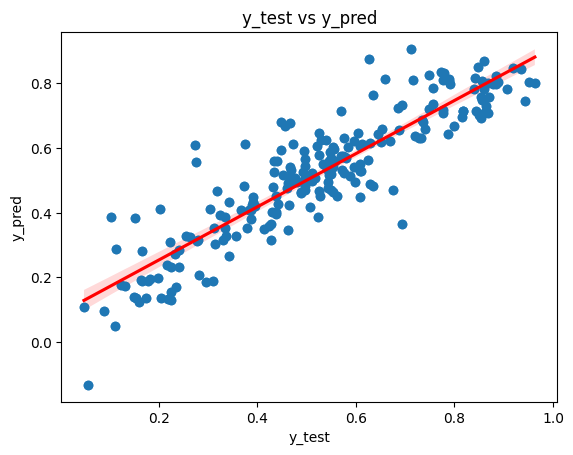

In [1144]:
# Plotting y_test and y_pred to understand the spread
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
plt.title('y_test vs y_pred')               
plt.xlabel('y_test')                         
plt.ylabel('y_pred')

#### Equation of the best fitted line

cnt = 0.2335*yr - 0.1052*holiday + 0.4907*temp - 0.1479*windspeed - 0.0492*July + 0.0760*Sep - 0.0483*Sun                - 0.2895*LightSnow - 0.0822*MistCloudy - 0.0655*spring + 0.0475*summer + 0.0848*winter + 0.2060

In [1146]:
# Finding out the mean squared error 

train_mse = (mean_squared_error(y_train, y_train_pred))
test_mse = (mean_squared_error(y_test, y_pred))
print('Mean squared error of the train set is', train_mse)
print('Mean squared error of the test set is', test_mse)

Mean squared error of the train set is 0.007997140724247096
Mean squared error of the test set is 0.009182032700258422


##### Since our model's mean squared error is almost 0, it implies that our model accurately predicts the variance between in both the test and train datasets